# Intro

My name is Naor Zagury, ID 311245393, student at the OpenU Data Science Workshop.

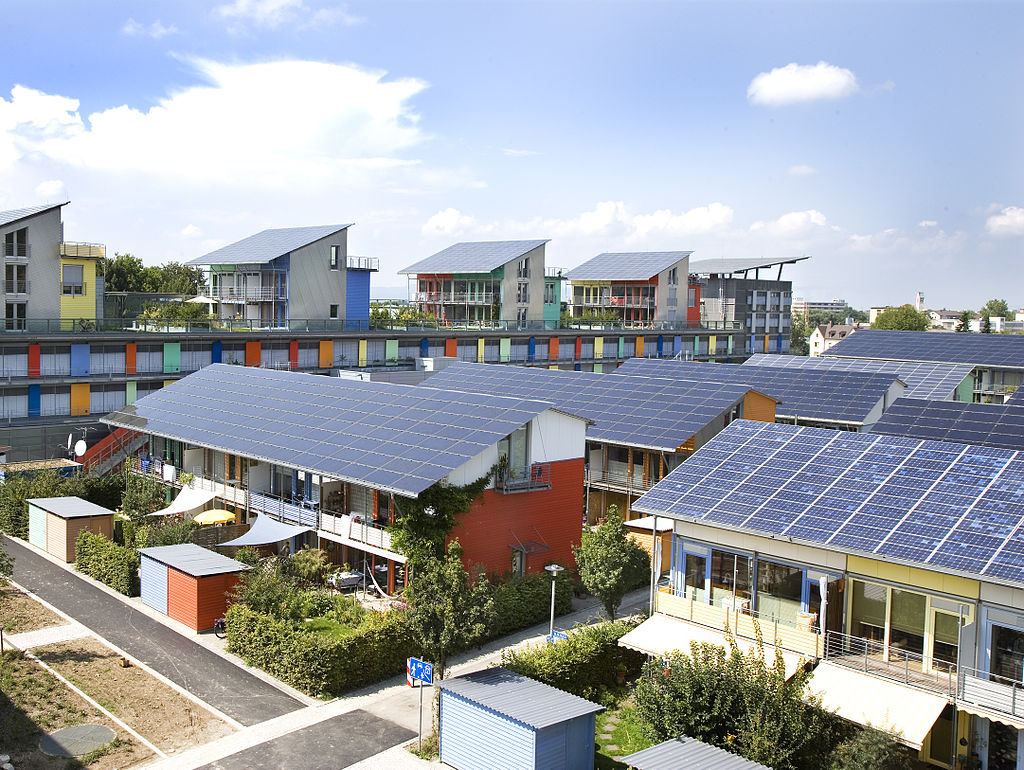

In [156]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/SoSie%2BSoSchiff_Ansicht.jpg/1024px-SoSie%2BSoSchiff_Ansicht.jpg")

The world runs on Electricity, and there are many ways to produce Electricity, but without a doubt, one way is better than all others.

Coal, for example, is hugely Pollutant. Several principal emissions result from coal combustion:
Sulfur dioxide (SO2), which contributes to acid rain and respiratory illnesses
Nitrogen oxides (NOx), which contribute to smog and respiratory illnesses
Particulates, which contribute to smog, haze, and respiratory diseases and lung disease
Carbon dioxide (CO2), which is the primary greenhouse gas produced from burning fossil fuels (coal, oil, and natural gas)
Mercury and other heavy metals, which have been linked to both neurological and developmental damage in humans and other animals
Fly ash and bottom ash, which are residues created when power plants burn coal

A great alternative uses the sun to generate electrical power, using photovoltaic (PV, conversion of light into Electricity) systems.

Those systems are comprised of multiple parts, including:
Solar Panels - to absorb and convert sunlight into Electricity
Solar inverter - to convert the output from direct to alternating current.
Mounting, Cabling, and other electrical accessories.
Solar tracking system to improve the system's overall performance
integrated battery solution, as prices for storage devices are expected to decline.
And most importantly, it is Clean Energy!



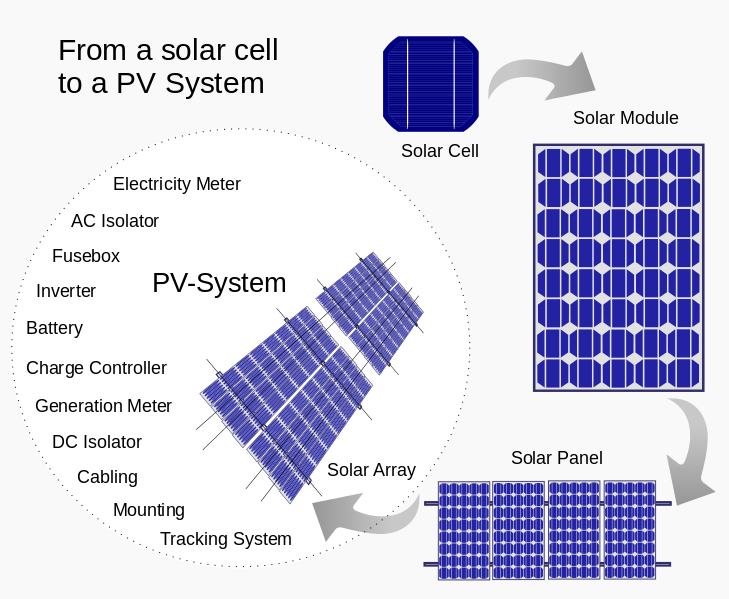

In [158]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/From_a_solar_cell_to_a_PV_system.svg/729px-From_a_solar_cell_to_a_PV_system.svg.png")

# The Problem

PV Systems cost a lot, and sometimes, hard to maintain and ensure effectiveness.
Using Data Science, we can improve or solve those problems, and encourage more people to use PV Systems to generate clean energy.

# The Solution

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant -

Can we predict the power generation for next couple of days? - this allows for better grid management
Can we identify the need for panel cleaning/maintenance?
Can we identify faulty or suboptimally performing equipment?

# The Data

We have 4 data sets, 2 for each plant.
1 for Power Generation and 1 for Weather sensors.

date_time - Date and time for each observation. Observations recorded at 15 minute intervals.
plant_id - Plant ID - this will be common for the entire file.
source_key - Source key in this file stands for the inverter id.
dc_power - Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
ac_power - Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
daily_yield - Daily yield is a cumulative sum of power generated on that day, till that point in time.
total_yield - This is the total yield for the inverter till that point in time.

ambient_temperature - This is the ambient temperature at the plant.
module_temperature - There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
irradiation - Amount of irradiation for the 15 minute interval.

We will try to use that data, to build our solution!

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [2]:
# Plant 1 Power and Weather files
p1g = pd.read_csv('Plant_1_Generation_Data.csv')
p1w = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
# Plant 2 Power and Weather files
p2g = pd.read_csv('Plant_2_Generation_Data.csv')
p2w = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [3]:
# Fix capitalized columns
p1g.columns = [col.lower() for col in p1g.columns]
p1w.columns = [col.lower() for col in p1w.columns]
p2g.columns = [col.lower() for col in p2g.columns]
p2w.columns = [col.lower() for col in p2w.columns]

### Data Preprocessing

First, we will explore our power generation dataset of plant 1, we will make sure we have no null objects, and check the data types of each column.
In addition, we will do the same to the weather dataset.

In [4]:
p1g.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
p1g.shape

(68778, 7)

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
date_time      68778 non-null object
plant_id       68778 non-null int64
source_key     68778 non-null object
dc_power       68778 non-null float64
ac_power       68778 non-null float64
daily_yield    68778 non-null float64
total_yield    68778 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


We can see that there are no null values, in addition, we see the date_time field, detected as an object. We will take care of that.

In [7]:
p1g.date_time = pd.to_datetime(p1g.date_time, dayfirst=True)
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
date_time      68778 non-null datetime64[ns]
plant_id       68778 non-null int64
source_key     68778 non-null object
dc_power       68778 non-null float64
ac_power       68778 non-null float64
daily_yield    68778 non-null float64
total_yield    68778 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [8]:
p1g.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Let's do the same for the weather dataset.

In [9]:
p1w.head()

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [10]:
p1w.shape

(3182, 6)

In [11]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
date_time              3182 non-null object
plant_id               3182 non-null int64
source_key             3182 non-null object
ambient_temperature    3182 non-null float64
module_temperature     3182 non-null float64
irradiation            3182 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.2+ KB


Let's do the same for the data_time field.

In [12]:
p1w.date_time = pd.to_datetime(p1w.date_time, yearfirst=True)
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
date_time              3182 non-null datetime64[ns]
plant_id               3182 non-null int64
source_key             3182 non-null object
ambient_temperature    3182 non-null float64
module_temperature     3182 non-null float64
irradiation            3182 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.2+ KB


In [13]:
p1w.date_time.describe()

count                    3182
unique                   3182
top       2020-06-09 12:30:00
freq                        1
first     2020-05-15 00:00:00
last      2020-06-17 23:45:00
Name: date_time, dtype: object

### Feature Extraction

Now, I will extract the hour, and month, and calculate the yield data delta in order to get the yield for each sample (15 minutes), which I intend to predict in my model. I will also extract the hour and month for the weather dataset.

In [14]:
p1g['hour'] = p1g.date_time.dt.hour
p1g['month'] = p1g.date_time.dt.month
p1w['hour'] = p1w.date_time.dt.hour
p1w['month'] = p1w.date_time.dt.month
p1g.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,hour,month
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,5
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,5
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,5
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,5


In [15]:
p1g.date_time.describe()

count                   68778
unique                   3158
top       2020-05-25 15:45:00
freq                       22
first     2020-05-15 00:00:00
last      2020-06-17 23:45:00
Name: date_time, dtype: object

In [16]:
p1g = p1g.sort_values(by=['source_key','date_time'])
p1g['sample_yield'] = p1g.sort_values(by=['source_key','date_time']).groupby('source_key')['total_yield'].diff()

In [17]:
p1g.head(n=10)

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,hour,month,sample_yield
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,NaN
21,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
42,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
63,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
84,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
106,2020-05-15 01:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
127,2020-05-15 01:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
148,2020-05-15 01:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
170,2020-05-15 02:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2,5,0.0
191,2020-05-15 02:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2,5,0.0


In [18]:
p1g.shape

(68778, 10)

In [19]:
p1g['sample_yield'].isna().sum() / p1g.shape[0] * 100

0.031986972578440784

We see that the yield of each source first sample of the data is NaN, which is 0.03% of all rows, we will trim those and continue.

In [20]:
p1g = p1g.dropna()

In [21]:
p1g.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,hour,month,sample_yield
21,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
42,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
63,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
84,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
106,2020-05-15 01:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0


In [22]:
p1g.shape

(68756, 10)

# EDA

We will look at the power yield over time, by days, and by hours.

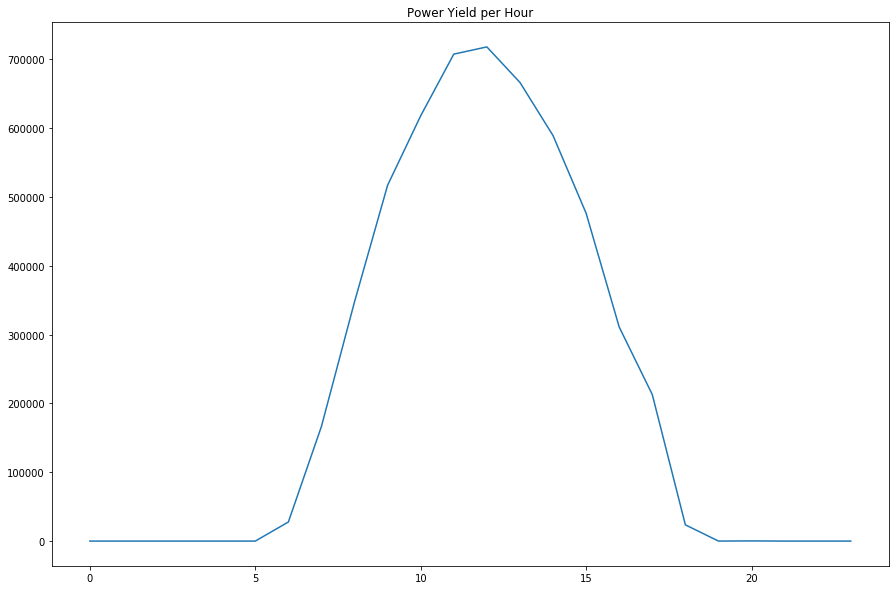

In [23]:
p1g_hours_yields = p1g[['sample_yield', 'hour']].groupby('hour').agg(sum)
plt.figure(figsize=(15, 10))
plt.title('Power Yield per Hour')
plt.plot(p1g_hours_yields.index, p1g_hours_yields.sample_yield);

As we can see, the plant generated power, only during the day, when the sun hits the solar panels. We can see the yield is highest around noon - when the tempratures are most likely the highset. Let's validate that, and look at the mean tempratures for each hour using the weather dataset.

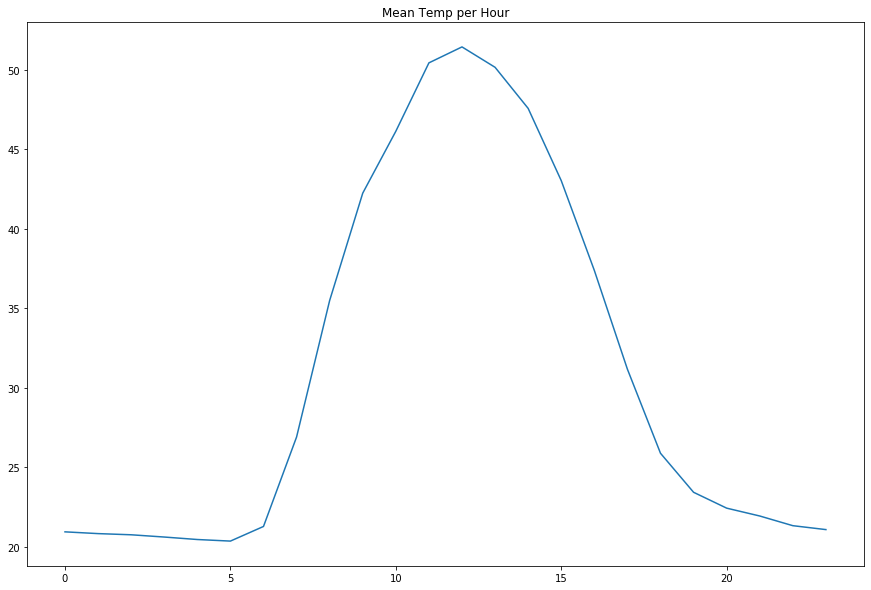

In [24]:
p1w_hours_temp = p1w[['module_temperature', 'hour']].groupby('hour').agg('mean')
plt.figure(figsize=(15, 10))
plt.title('Mean Temp per Hour')
plt.plot(p1w_hours_temp.index, p1w_hours_temp.module_temperature);

As we can see, we were right for the module temperature.
Let's do the same thing for irradiation and ambient temperature.

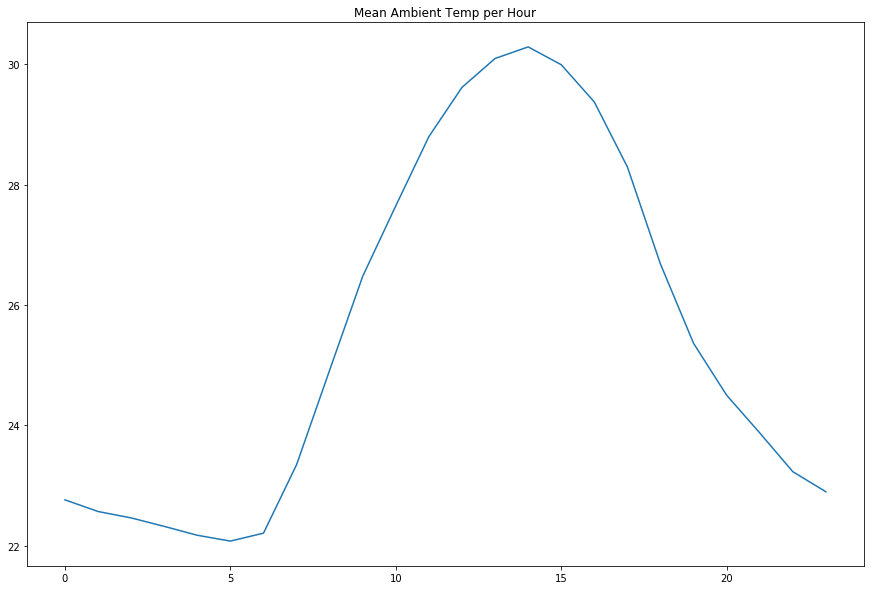

In [25]:
p1w_hours_temp = p1w[['ambient_temperature', 'hour']].groupby('hour').agg('mean')
plt.figure(figsize=(15, 10))
plt.title('Mean Ambient Temp per Hour')
plt.plot(p1w_hours_temp.index, p1w_hours_temp.ambient_temperature);

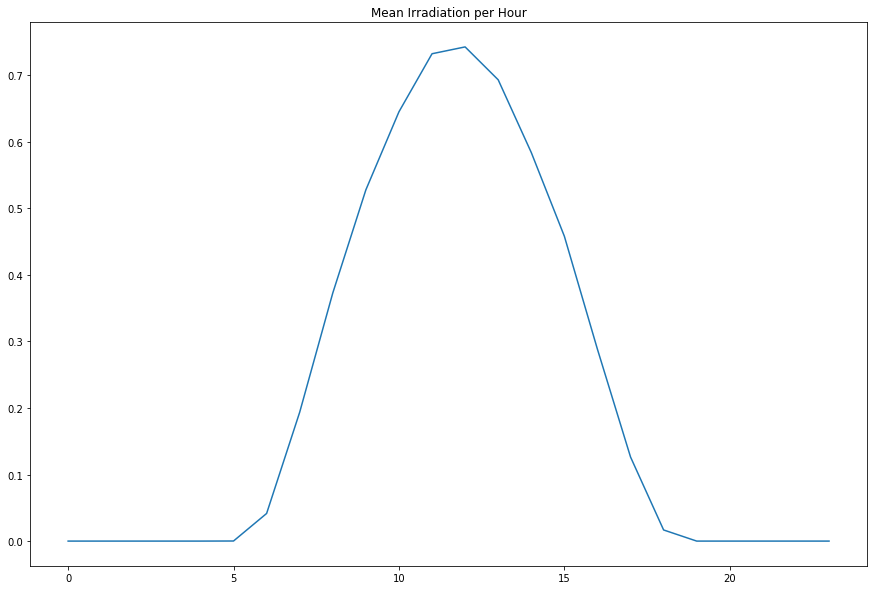

In [26]:
p1w_hours_irr = p1w[['irradiation', 'hour']].groupby('hour').agg('mean')
plt.figure(figsize=(15, 10))
plt.title('Mean Irradiation per Hour')
plt.plot(p1w_hours_irr.index, p1w_hours_irr.irradiation);

As we can see, both the module, and ambient temperatures, as well as sun irradiation are in correlation with the mean yield per 15 minutes. Now, we will merge both datasets, in order to move to the next phase.

In [27]:
p1g.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,hour,month,sample_yield
21,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
42,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
63,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0
84,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0
106,2020-05-15 01:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,1,5,0.0


In [28]:
p1w.head()

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation,hour,month
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,5
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,0,5
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,0,5
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,0,5
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,1,5


In [29]:
p1g.date_time.describe()

count                   68756
unique                   3157
top       2020-05-25 15:45:00
freq                       22
first     2020-05-15 00:15:00
last      2020-06-17 23:45:00
Name: date_time, dtype: object

In [30]:
p1w.source_key.describe()

count                3182
unique                  1
top       HmiyD2TTLFNqkNe
freq                 3182
Name: source_key, dtype: object

In [31]:
p1g.plant_id.value_counts()

4135001    68756
Name: plant_id, dtype: int64

In [32]:
p1 = p1g.merge(p1w[['date_time', 'ambient_temperature', 'module_temperature', 'irradiation']], how='inner', on=['date_time'])

In [33]:
p1.head()

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield,hour,month,sample_yield,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,5,0.0,25.084589,22.761668,0.0
1,2020-05-15 00:15:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,5,0.0,25.084589,22.761668,0.0
2,2020-05-15 00:15:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,5,0.0,25.084589,22.761668,0.0
3,2020-05-15 00:15:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,5,0.0,25.084589,22.761668,0.0
4,2020-05-15 00:15:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,5,0.0,25.084589,22.761668,0.0


In [34]:
p1.shape

(68752, 13)

Now we are ready for the next phase.

# Training a Regression Model + Analysis of the Model

In this phase, we will explore a naive out-of-the-box regression model that will take the temperatures, irradiation, and hour features, in order to predict the output yield.

According to the Scikit Learn "Choosing the right estimator" chart, we are looking at a regression problem, in which we have less than 100K samples (we have 68K). In that case, it is recommended to use the Lasso model.

In [35]:
from sklearn.linear_model import Lasso

"Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.", therefore we should normalize our features before we move on.

In [36]:
from sklearn import preprocessing

In [37]:
p1_features = ['ambient_temperature', 'module_temperature', 'irradiation', 'hour']
p1_label = 'sample_yield'

In [38]:
X = p1[p1_features]
y = p1[p1_label]

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled, columns=p1_features)

In [40]:
X.head()

,ambient_temperature,module_temperature,irradiation,hour
0,25.084589,22.761668,0.0,0
1,25.084589,22.761668,0.0,0
2,25.084589,22.761668,0.0,0
3,25.084589,22.761668,0.0,0
4,25.084589,22.761668,0.0,0


In [41]:
X_norm.head()

,ambient_temperature,module_temperature,irradiation,hour
0,0.315477,0.097484,0.0,0.0
1,0.315477,0.097484,0.0,0.0
2,0.315477,0.097484,0.0,0.0
3,0.315477,0.097484,0.0,0.0
4,0.315477,0.097484,0.0,0.0


In [42]:
X_norm.describe()

,ambient_temperature,module_temperature,irradiation,hour
count,68752.000000,68752.000000,68752.000000,68752.000000
mean,0.347391,0.276494,0.190217,0.503077
std,0.226325,0.259661,0.247179,0.298289
min,0.000000,0.000000,0.000000,0.000000
25%,0.156047,0.062937,0.000000,0.260870
50%,0.287010,0.141279,0.026095,0.521739
75%,0.509084,0.496848,0.372348,0.739130
max,1.000000,1.000000,1.000000,1.000000


Now, after we have the normalized features, we can split to train and test, and train out model.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [45]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

Now, when we have out trained model, we will use the RMSE (Root Mean Squared Error) metric, to asses our model (basically predicting all the test set and comparing the results to get the average error).

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.67313296229165

In [48]:
y_test.describe()

count    22689.000000
mean        77.474055
std        107.315546
min          0.000000
25%          0.000000
50%         10.929000
75%        155.786000
max       3149.167000
Name: sample_yield, dtype: float64

At first sight, this looks like a pretty bad model! BUT, we can't really know for now. Let's try to get the percentage of mistake by using the MAPE metric.

In [52]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
MAPE(y_test, y_pred)

inf

Oh, no! we have some 0 values... MAPE doesn't like that. Let's try MASE then.

In [60]:
def MASE(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1) 
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [61]:
MASE(y_train, y_test, y_pred)

0.10381085475127025

This is quite low for MASE! Which is good, let's understand why, and if it really is that good.
The number we got, means that the average error of the model is 10% of the error of the Naive Random Walk model that predicts based on the previous value.

I will end the experiment with showing a histogram of my test labels and predicted labels, as well as a histogram of the error.

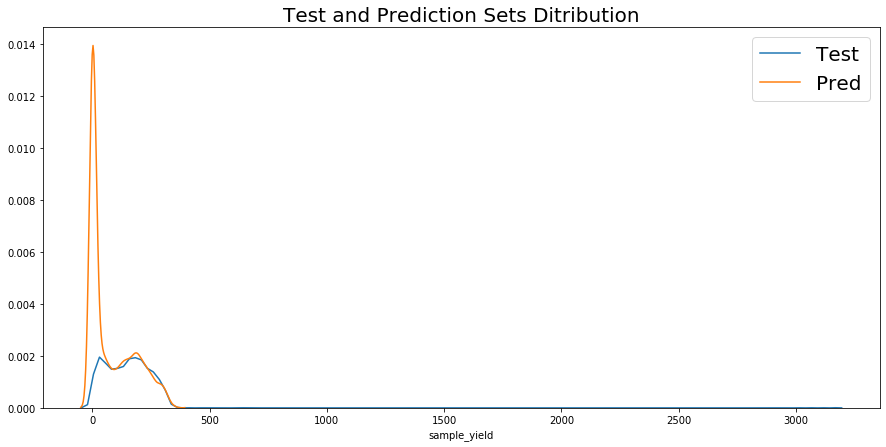

In [152]:
plt.figure(figsize=(15,7))
sns.distplot(y_test, hist=False, kde=True, label='Test')
sns.distplot(y_pred, hist=False, kde=True, label='Pred')
plt.legend(loc=1, prop={'size': 20})
plt.title('Test and Prediction Sets Ditribution', fontdict={'fontsize':20});

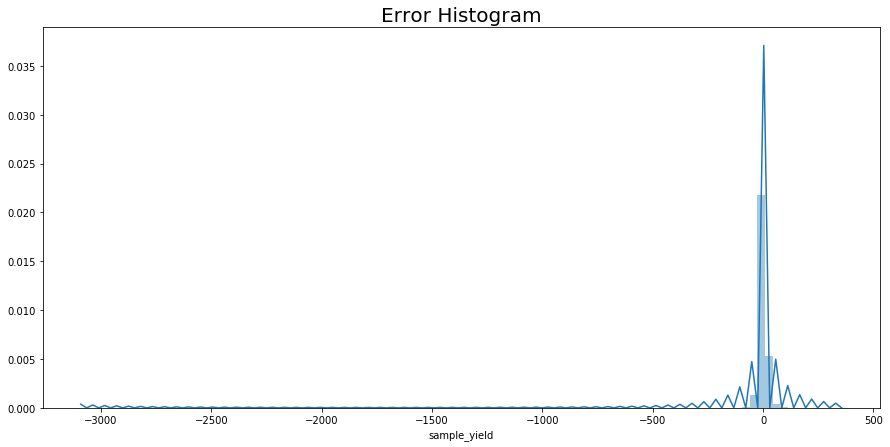

In [155]:
plt.figure(figsize=(15,7))
sns.distplot(y_pred-y_test, kde=True, bins=100);
plt.title('Error Histogram', fontdict={'fontsize':20});

As we can see, our errors are around 0, but our test set max is 3K with a long tail and pred set about 300 which is a little odd and requires furthur examination. In addition, we see that our prediction set has many zeros, much more than our test.



# Thoughts about the Project and Next Steps

1. Try other models, e.g. deep learning based models.
2. Try a time series model (such as Prophet).
3. Consider using a weather API to predict next couple of days yield.
4. Consider anomaly detection based on time series model to detect faulty panels.
5. Enhance EDA and try to find out if AC/DC yield might be better than the sample yield.
6. Evaluate which features are more relevant to the prediction.
7. Tune hyperparameters of the models to reach better results.
8. Compare the diffenet models.
9. Consider using data from the second plant as well.

I would like to get your opinions on that, and which steps do you think I should continue with.

Thanks,
Naor.